### Import Essential Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
%matplotlib inline

In [ ]:
# gmail account authorization
import pandas
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#use gdrive
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
df=pd.read_csv("dataset_sdn.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_sdn.csv'

In [ ]:
df  = pd.read_csv("dataset_sdn.csv")
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_sdn.csv'

### Data Preprocessing

#### Dataset Dimensions

In [ ]:
print("This Dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

This Dataset has 104345 rows and 23 columns


#### Concise summary of dataset

In [ ]:
df.info()

NameError: name 'df' is not defined

#### Descriptive statistics of dataset

In [ ]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


#### heatmap of missing values

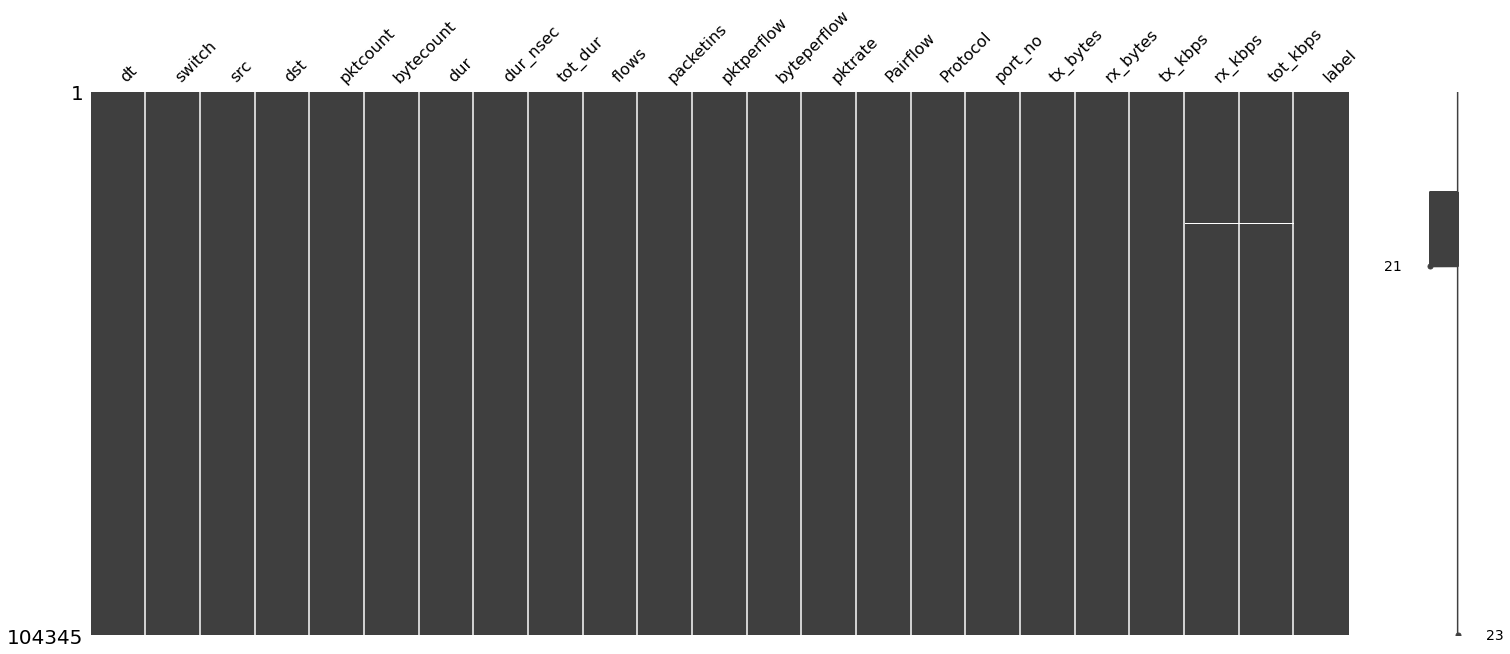

In [ ]:
msno.matrix(df)

#### Count of null values in each feature

In [ ]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [ ]:
(df.isnull().sum()/df.isnull().count())*100

dt             0.00000
switch         0.00000
src            0.00000
dst            0.00000
pktcount       0.00000
bytecount      0.00000
dur            0.00000
dur_nsec       0.00000
tot_dur        0.00000
flows          0.00000
packetins      0.00000
pktperflow     0.00000
byteperflow    0.00000
pktrate        0.00000
Pairflow       0.00000
Protocol       0.00000
port_no        0.00000
tx_bytes       0.00000
rx_bytes       0.00000
tx_kbps        0.00000
rx_kbps        0.48493
tot_kbps       0.48493
label          0.00000
dtype: float64

#### Drop rows with null values

In [ ]:
df.dropna(inplace=True)

#### Info after handling Null Values

In [ ]:
print(df.isnull().sum())
print("This Dataframe has {} rows and {} columns after removing null values".format(df.shape[0], df.shape[1]))

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64
This Dataframe has 103839 rows and 23 columns after removing null values


#### Distribution of Target Class

In [ ]:
malign = df[df['label'] == 1]
benign = df[df['label'] == 0]

print('Number of DDOS attacks that has occured :',round((len(malign)/df.shape[0])*100,2),'%')
print('Number of DDOS attacks that has not occured :',round((len(benign)/df.shape[0])*100,2),'%')

Number of DDOS attacks that has occured : 39.01 %
Number of DDOS attacks that has not occured : 60.99 %


#### Barplot of Target Class

Text(0, 0.5, 'Frequency %')

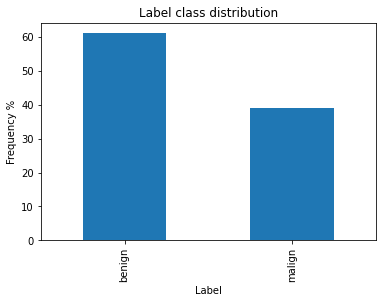

In [ ]:
# Let's plot the Label class against the Frequency
labels = ['benign','malign']
classes = pd.value_counts(df['label'], sort = True) / df['label'].count() *100
classes.plot(kind = 'bar')
plt.title("Label class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Frequency %")

#### Pairplot of select features

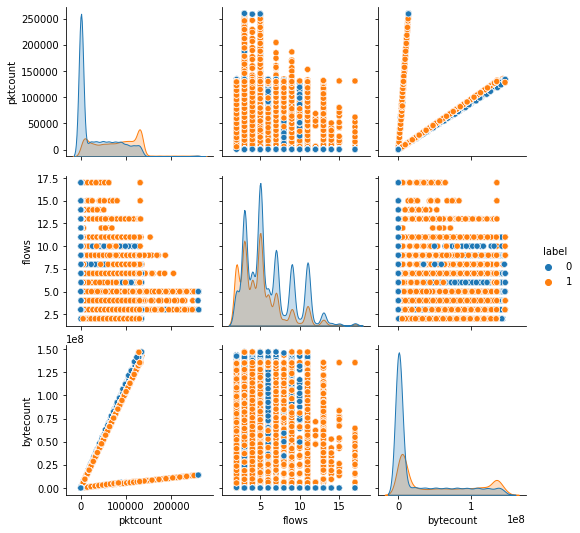

In [ ]:
sns.pairplot(df,hue="label",vars=['pktcount','flows','bytecount'])

#### Columns in the dataset

In [ ]:
df.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

#### Unique values in each column

In [ ]:
print(df.apply(lambda col: col.unique()))

dt             [11425, 11605, 11455, 11515, 9906, 11335, 1157...
switch                           [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
src            [10.0.0.1, 10.0.0.2, 10.0.0.4, 10.0.0.10, 10.0...
dst            [10.0.0.8, 10.0.0.7, 10.0.0.3, 10.0.0.5, 10.0....
pktcount       [45304, 126395, 90333, 103866, 85676, 32914, 4...
bytecount      [48294064, 134737070, 96294978, 110721156, 913...
dur            [100, 280, 200, 230, 190, 73, 10, 250, 80, 260...
dur_nsec       [716000000, 734000000, 744000000, 747000000, 7...
tot_dur        [101000000000.0, 281000000000.0, 201000000000....
flows          [3, 2, 4, 5, 6, 7, 8, 11, 9, 10, 13, 15, 17, 1...
packetins      [1943, 1931, 1790, 1306, 1910, 2242, 2175, 110...
pktperflow     [13535, 13531, 13534, 13533, 13306, 13385, 0, ...
byteperflow    [14428310, 14424046, 14427244, 14426178, 14184...
pktrate        [451, 443, 446, 0, 288, 450, 448, 449, 455, 14...
Pairflow                                                  [0, 1]
Protocol                 

#### Numerical Features

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print("The number of numerical features is",len(numerical_features),"and they are : \n",numerical_features)

The number of numerical features is 20 and they are : 
 ['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


#### Categorical Features

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print("The number of categorical features is",len(categorical_features),"and they are : \n",categorical_features)

The number of categorical features is 3 and they are : 
 ['src', 'dst', 'Protocol']


#### Number of Unique values in the numerical features

In [ ]:
# number of unique values in each numerical variable
df[numerical_features].nunique(axis=0)

dt               858
switch            10
pktcount        9044
bytecount       9270
dur              840
dur_nsec        1000
tot_dur         4183
flows             15
packetins        168
pktperflow      2092
byteperflow     2793
pktrate          446
Pairflow           2
port_no            5
tx_bytes       12257
rx_bytes       11623
tx_kbps         1800
rx_kbps         1730
tot_kbps        2259
label              2
dtype: int64

#### Discrete numerical features

In [ ]:
#discrete numerical features
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<=15 and feature != 'label']
print("The number of discrete features is",len(discrete_feature),"and they are : \n",discrete_feature)

The number of discrete features is 4 and they are : 
 ['switch', 'flows', 'Pairflow', 'port_no']


In [ ]:
df[discrete_feature].head(10)

,switch,flows,Pairflow,port_no
0,1,3,0,3
1,1,2,0,4
2,1,3,0,1
3,1,3,0,2
4,1,3,0,3
5,1,3,0,1
6,1,3,0,4
7,1,3,0,1
8,1,3,0,2
9,1,3,0,4


#### Continuous features

In [ ]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature + ['label']]
print("The number of continuous_feature features is",len(continuous_feature),"and they are : \n",continuous_feature)

The number of continuous_feature features is 15 and they are : 
 ['dt', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']


### Exploratory Data Analysis

#### Plotting function definition

In [ ]:
def countplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.countplot(y=col, data=df).set(title = 'Distribution of ' + col)

def histplot_distribution(col):
    sns.set_theme(style="darkgrid")
    sns.histplot(data=df,x=col, kde=True,color="red").set(title = 'Distribution of ' + col)

#### Visualize the distribution of Categorical features

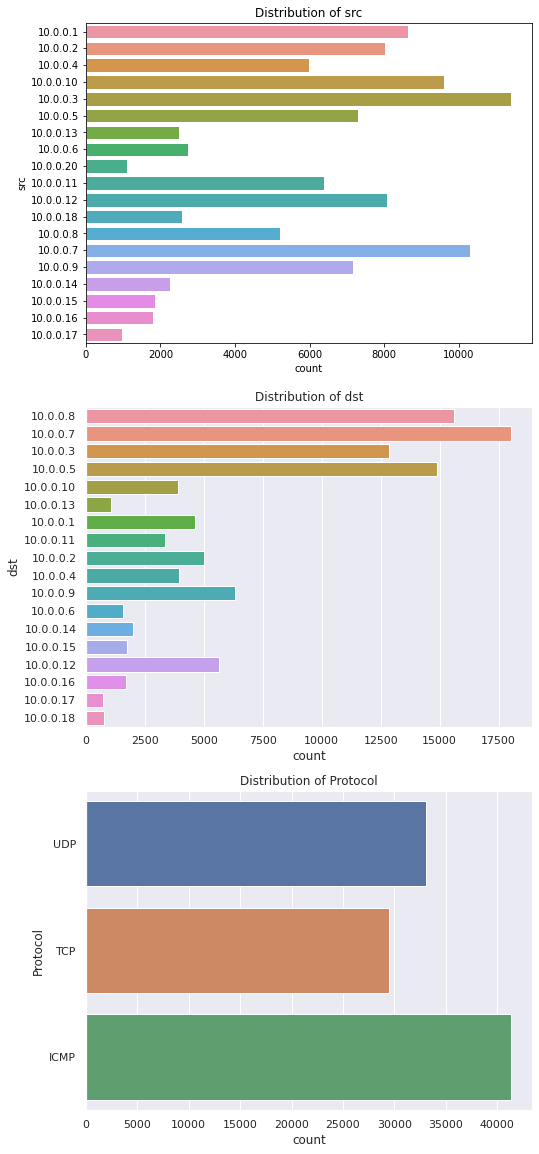

In [ ]:
## Lets analyse the categorical values by creating histograms to understand the distribution
f = plt.figure(figsize=(8,20))
for i in range(len(categorical_features)):
    f.add_subplot(len(categorical_features), 1, i+1)
    countplot_distribution(categorical_features[i])
plt.show()

#### Visualize the quartiles of categorical features wrt total duration

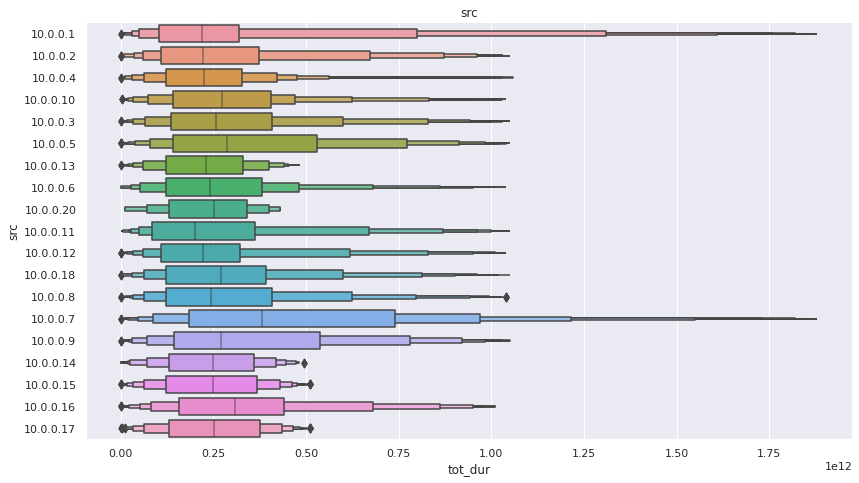

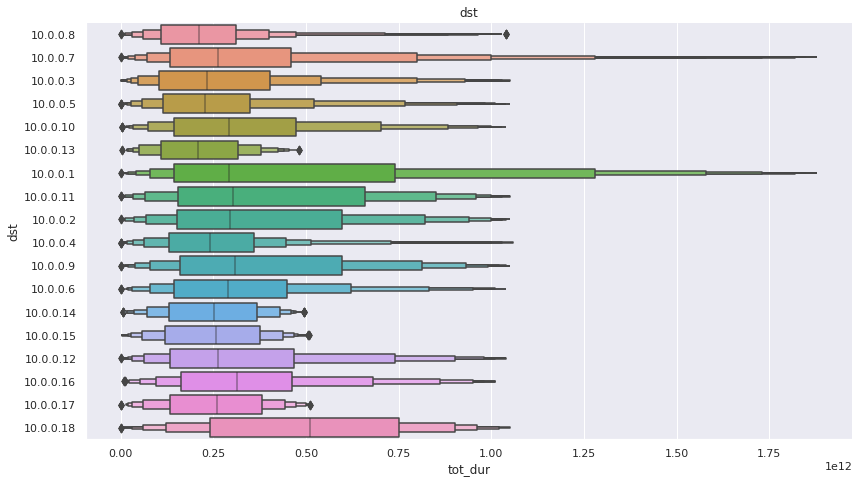

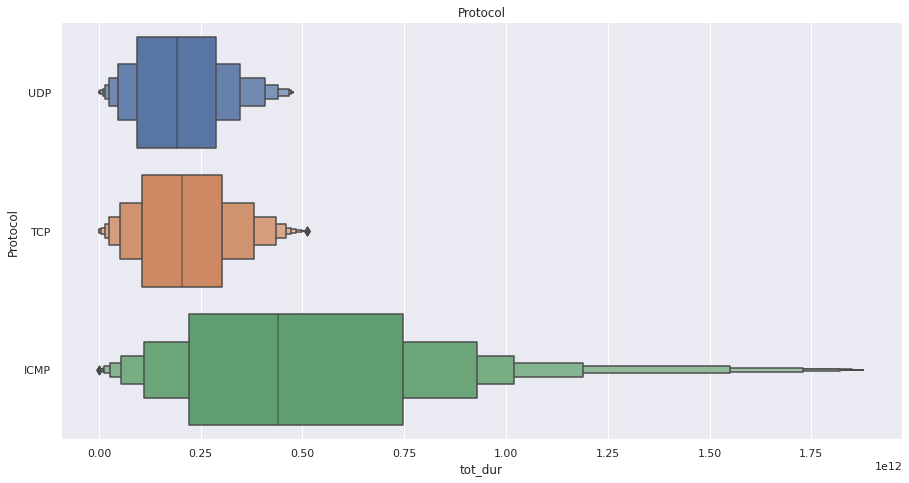

In [ ]:
for i in range(len(categorical_features)):
    g = sns.catplot(data=df,x="tot_dur",y=categorical_features[i],kind="boxen").set(title = categorical_features[i])
    g.fig.set_figheight(7)
    g.fig.set_figwidth(15)

#### Visualize the distribution of continuous features

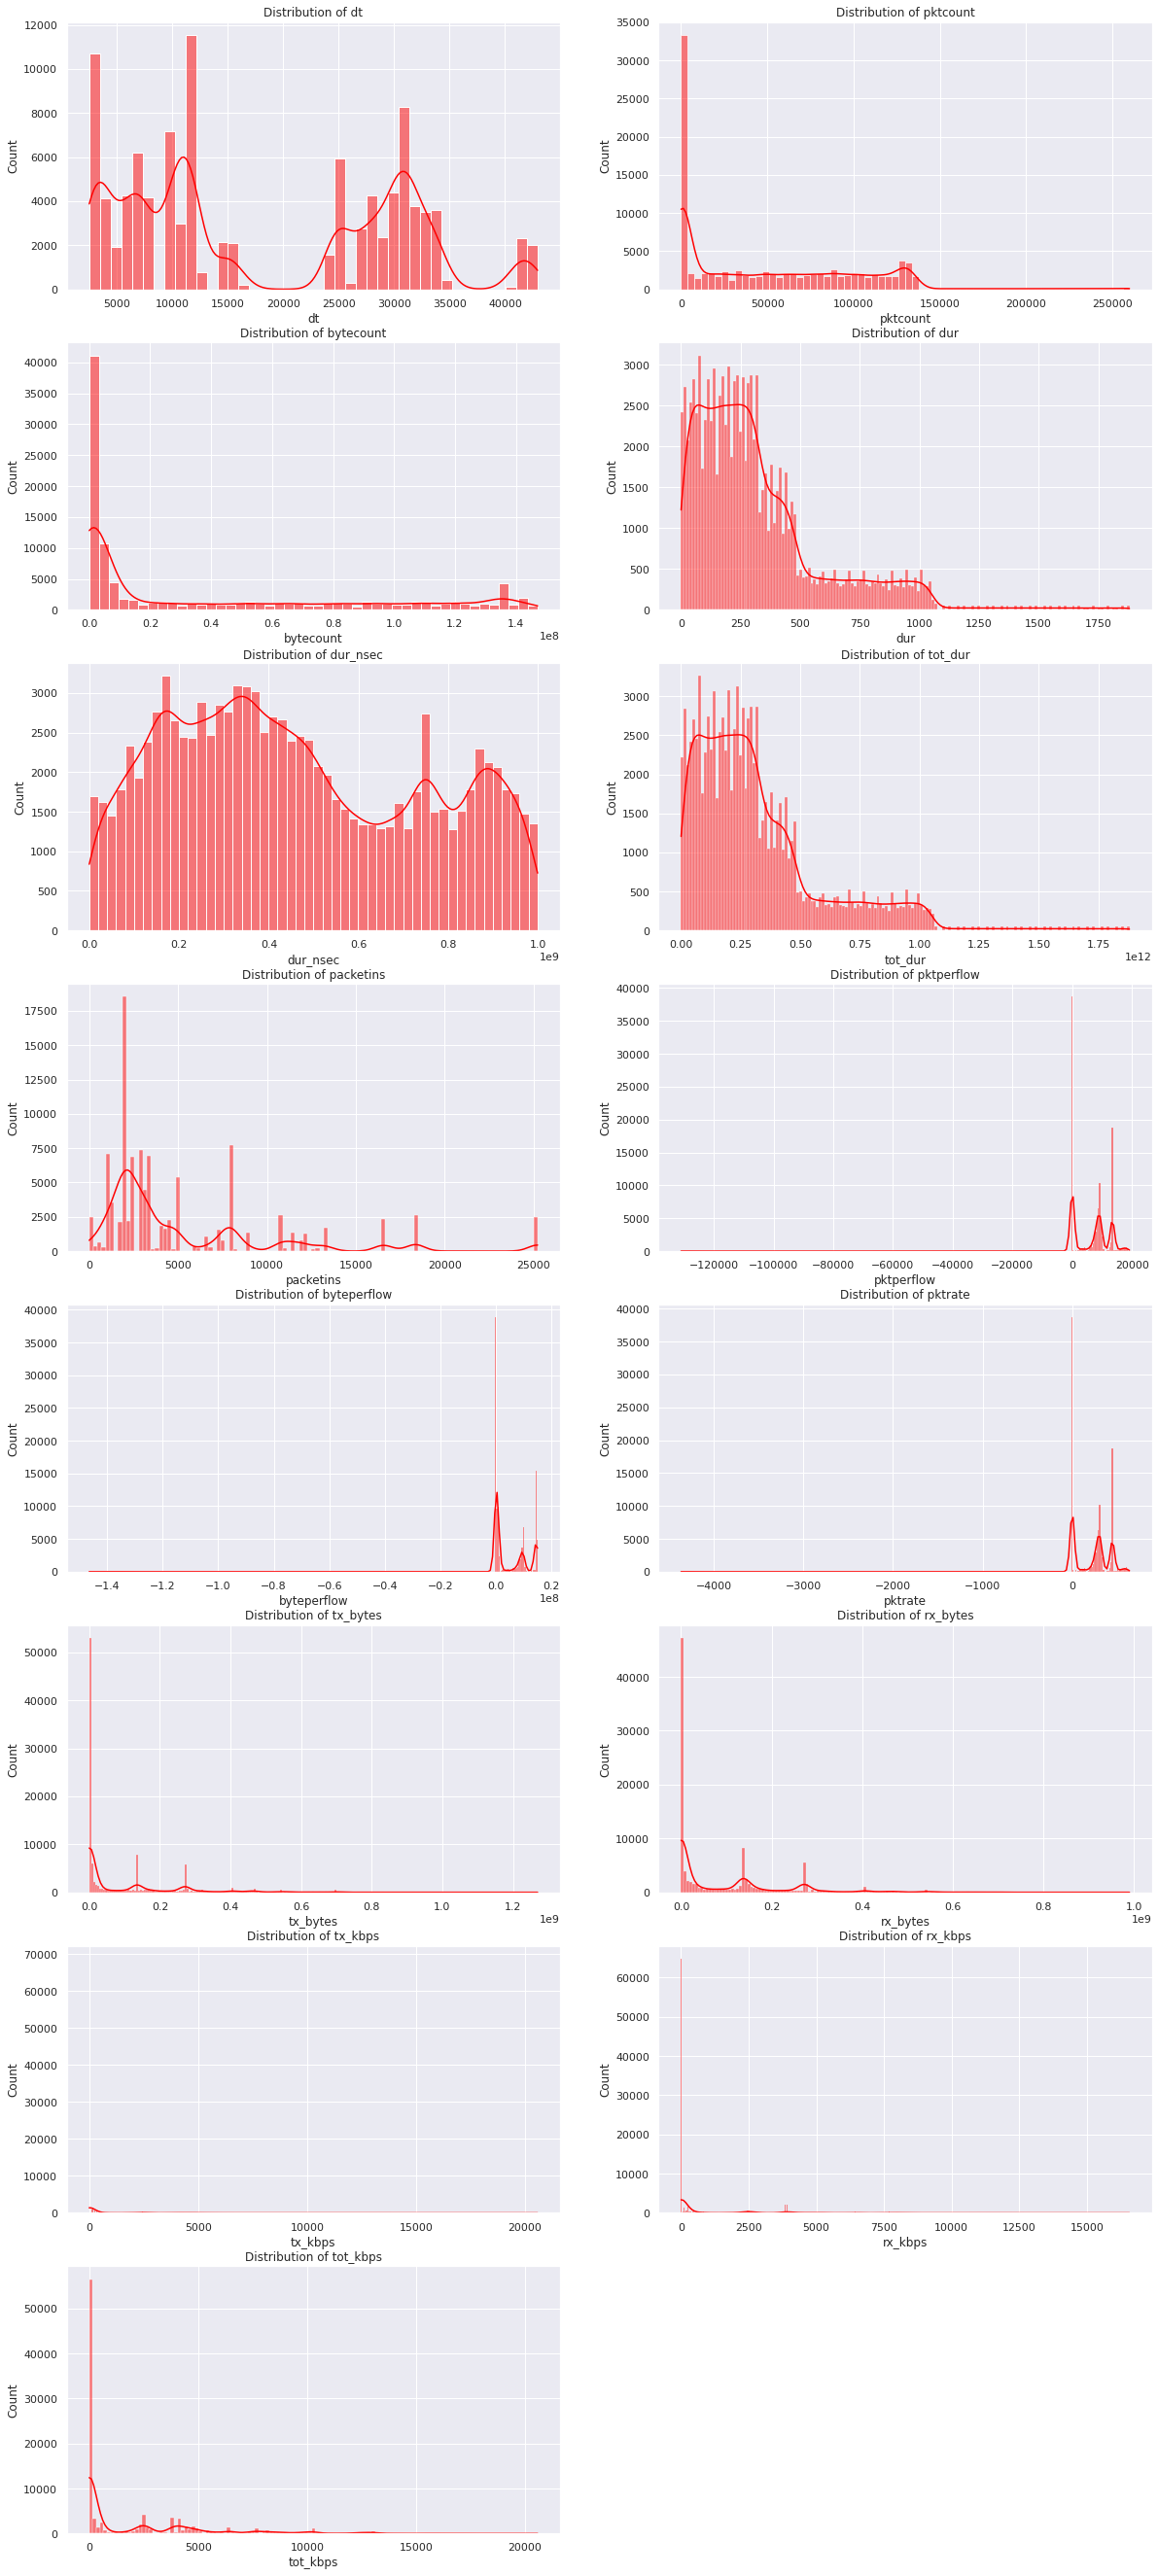

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution
f = plt.figure(figsize=(20,90))
for i in range(len(continuous_feature)):
    f.add_subplot(len(continuous_feature), 2, i+1)
    histplot_distribution(continuous_feature[i])
plt.show()

#### Visualize the distribution of continuous features wrt packet count, protocol and type of attack

<Figure size 1440x1440 with 0 Axes>

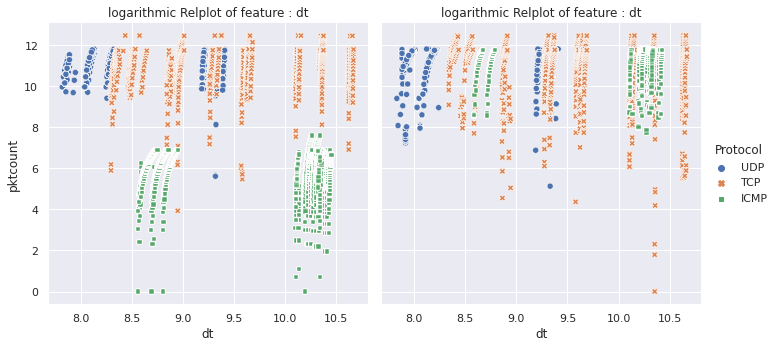

<Figure size 1440x1440 with 0 Axes>

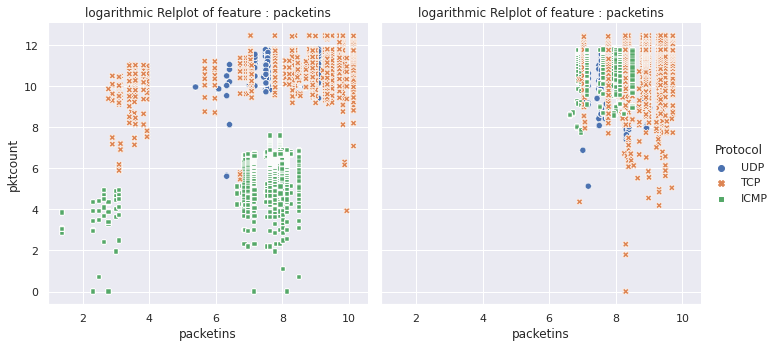

<Figure size 1440x1440 with 0 Axes>

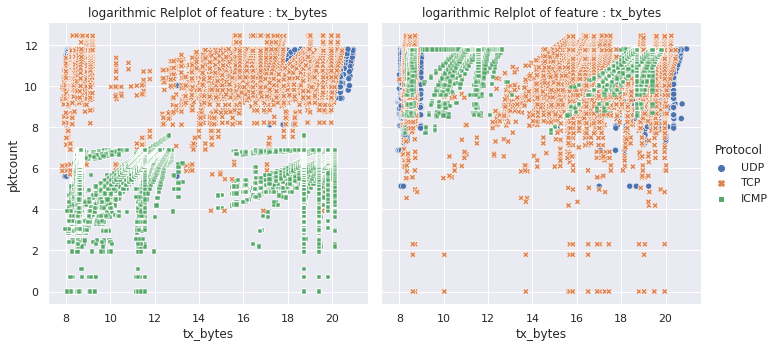

<Figure size 1440x1440 with 0 Axes>

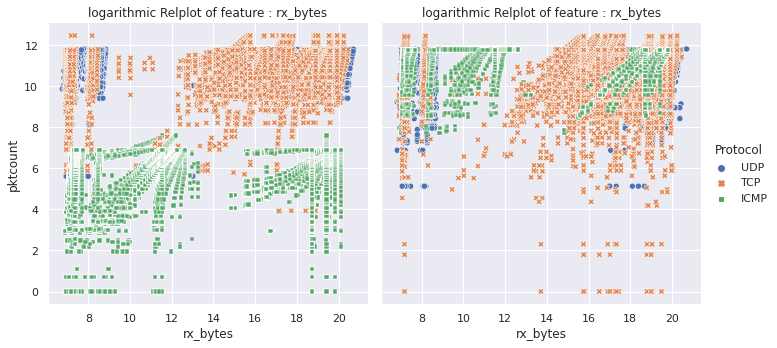

In [ ]:
## Relplot of log(variable)
import warnings
warnings.filterwarnings("ignore")
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['pktcount']=np.log(data['pktcount'])
        plt.figure(figsize=(20,20))
        sns.relplot(data=data, x=data[feature],y=data['pktcount'],hue="Protocol",style="Protocol",
                    col="label",kind="scatter").set(title="logarithmic Relplot of feature : " + feature)

#### Visualize the distribution of numerical discrete features

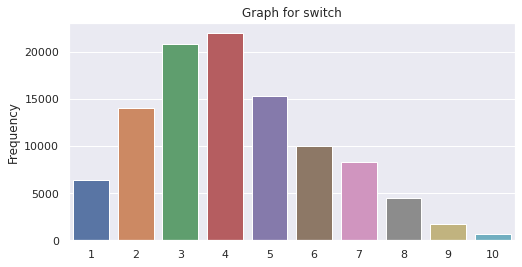

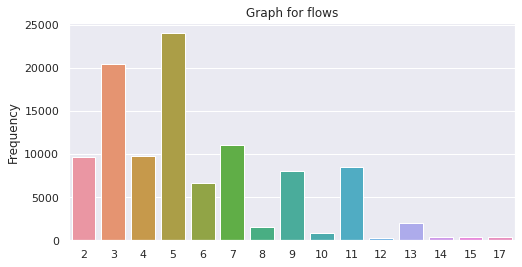

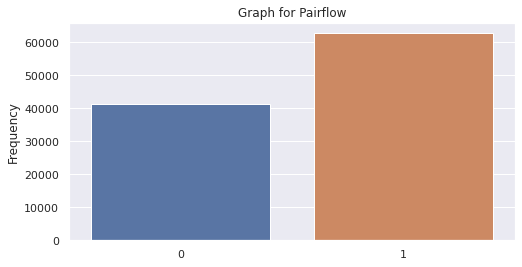

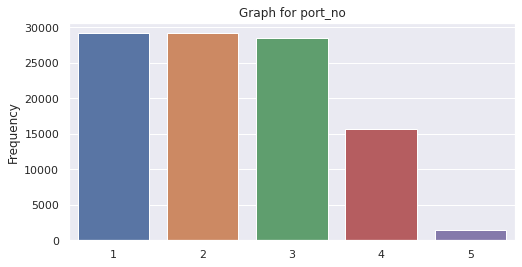

In [ ]:
for feature in discrete_feature:
    plt.figure(figsize=(8,4))
    cat_num = df[feature].value_counts()
    sns.barplot(x=cat_num.index, y = cat_num).set(title = "Graph for "+feature, ylabel="Frequency")
    plt.show()

In [ ]:
def get_percentage_malign_protocols():
    arr = [x for x, y in zip(df['Protocol'], df['label']) if y == 1]
    perc_arr = []
    for i in ['UDP','TCP','ICMP']:
        perc_arr.append(arr.count(i)/len(arr) *100)
    return perc_arr

#### Distribution of protocols for malign attacks

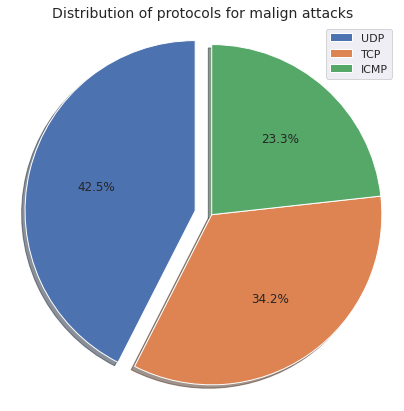

In [ ]:
fig1, ax1 = plt.subplots(figsize=[7,7])
ax1.pie(get_percentage_malign_protocols(), explode=(0.1, 0, 0), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(['UDP', 'TCP', 'ICMP'],loc="best")
plt.title('Distribution of protocols for malign attacks',fontsize = 14)
plt.show()

#### Checking for outliers in Packet count feature

Text(0.5, 1.0, 'Boxplot, Packet count for different protocols')

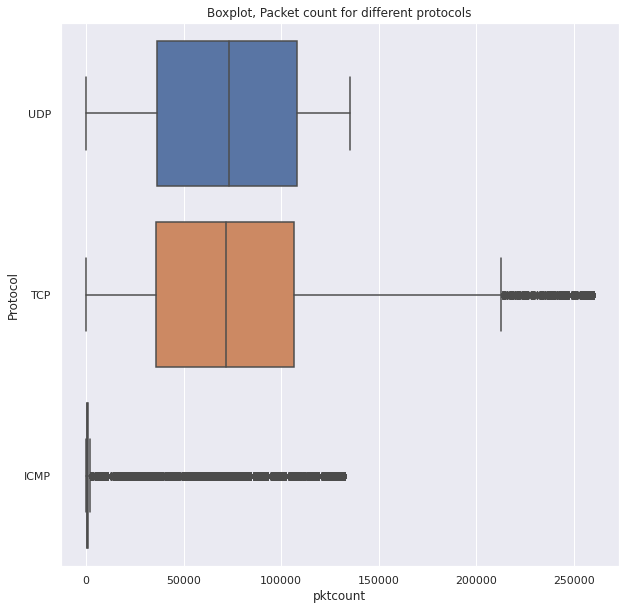

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])
sns.boxplot(
    data=df,
    x='pktcount',
    y='Protocol'
)
ax.set_title('Boxplot, Packet count for different protocols')

#### Heat map of correlation of features

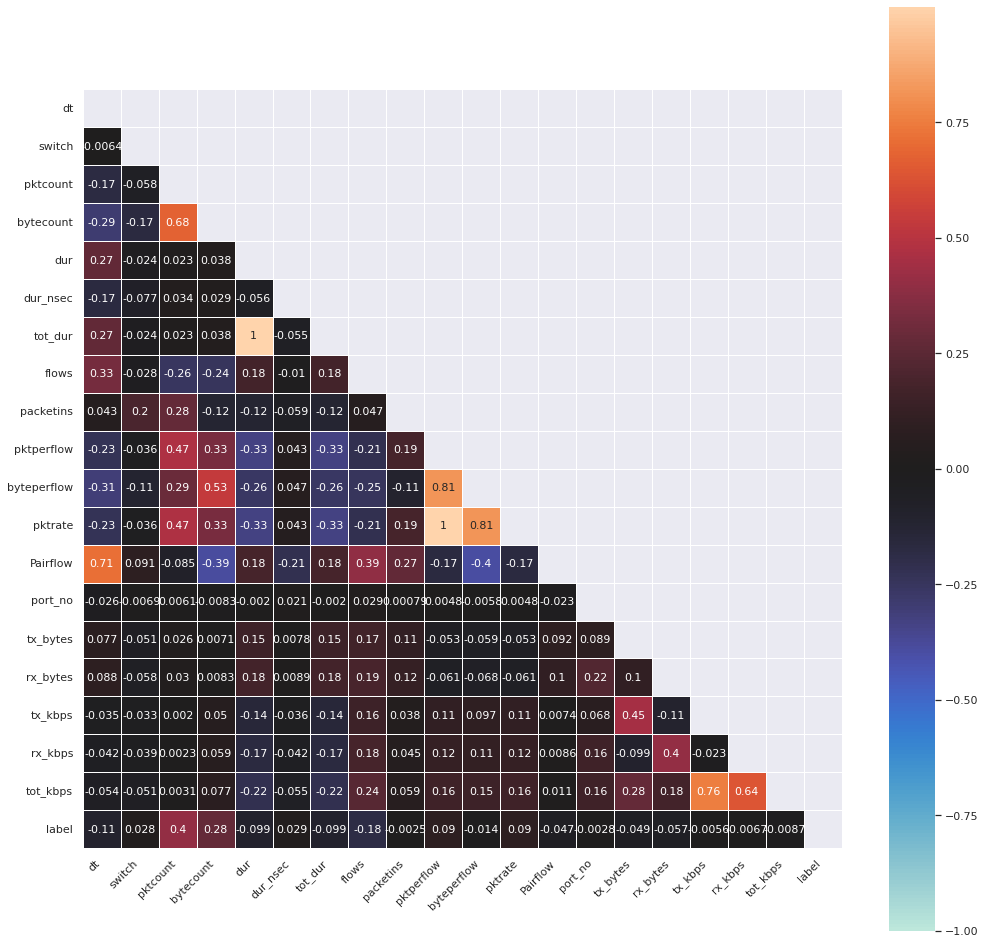

In [ ]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(17,17))
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
sns.set_theme(style="darkgrid")
ax = sns.heatmap(correlation_matrix,square = True,annot=True,center=0,vmin=-1,linewidths = .5,annot_kws = {"size": 11},mask = mask)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');
plt.show()

In [ ]:
print("Features which need to be encoded are : \n" ,categorical_features)

Features which need to be encoded are : 
 ['src', 'dst', 'Protocol']


### Encoding categorical features

In [ ]:
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df.shape[0], df.shape[1]))

This Dataframe has 103839 rows and 57 columns after encoding


In [ ]:
#dataframe after encoding
df.tail(10)

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,dst_10.0.0.2,dst_10.0.0.3,dst_10.0.0.4,dst_10.0.0.5,dst_10.0.0.6,dst_10.0.0.7,dst_10.0.0.8,dst_10.0.0.9,Protocol_TCP,Protocol_UDP
104335,5232,3,1,98,1,788000000,1.788000e+09,5,10,0,...,0,0,0,0,0,0,0,0,0,0
104336,5262,3,79,7742,81,867000000,8.186700e+10,5,10,29,...,0,0,0,1,0,0,0,0,0,0
104337,5262,3,79,7742,81,867000000,8.186700e+10,5,10,29,...,0,0,0,1,0,0,0,0,0,0
104338,5262,3,79,7742,81,867000000,8.186700e+10,5,10,29,...,0,0,0,1,0,0,0,0,0,0
104339,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,0,0,0,1,0,0,0,0
104340,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,0,0,0,1,0,0,0,0
104341,5262,3,79,7742,81,842000000,8.184200e+10,5,10,29,...,0,0,0,0,0,1,0,0,0,0
104342,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,0,0,0,1,0,0,0,0,0,0
104343,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,0,0,0,1,0,0,0,0,0,0
104344,5262,3,31,3038,31,805000000,3.180500e+10,5,10,30,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df.dtypes

dt                 int64
switch             int64
pktcount           int64
bytecount          int64
dur                int64
dur_nsec           int64
tot_dur          float64
flows              int64
packetins          int64
pktperflow         int64
byteperflow        int64
pktrate            int64
Pairflow           int64
port_no            int64
tx_bytes           int64
rx_bytes           int64
tx_kbps            int64
rx_kbps          float64
tot_kbps         float64
label              int64
src_10.0.0.10      uint8
src_10.0.0.11      uint8
src_10.0.0.12      uint8
src_10.0.0.13      uint8
src_10.0.0.14      uint8
src_10.0.0.15      uint8
src_10.0.0.16      uint8
src_10.0.0.17      uint8
src_10.0.0.18      uint8
src_10.0.0.2       uint8
src_10.0.0.20      uint8
src_10.0.0.3       uint8
src_10.0.0.4       uint8
src_10.0.0.5       uint8
src_10.0.0.6       uint8
src_10.0.0.7       uint8
src_10.0.0.8       uint8
src_10.0.0.9       uint8
dst_10.0.0.10      uint8
dst_10.0.0.11      uint8


### Split into Independent and dependent variables

In [ ]:
#separating input and output attributes
x = df.drop(['label'], axis=1)
y = df['label']
x.shape

(103839, 56)

### Normalizing features

In [ ]:
ms = MinMaxScaler()
x = ms.fit_transform(x)

### Train-Test-Split [70-30]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3)
print(X_train.shape, X_test.shape)

TypeError: ignored

## BASELINE CLASSIFIERS
1. DNN
2. KNN
3. SVM
4. Decision tree
5. Naive Bayes
6. Quadratic Discriminant Analaysis
7. SGD
8. Logistic Regression
9. XGBoost

#### Deep Neural Network

In [ ]:
Classifier_accuracy = []

## Defining the Deep Neural Network

In [ ]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(28 , input_shape=(56,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(10 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 28)                1596      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 10)                290       
                                                                 
 Output_Layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


## Model fitting

In [ ]:
# fit model
history_org = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=100, verbose=2,
    callbacks=None,
    validation_data=(X_test,y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0)

Epoch 1/100
2272/2272 - 9s - loss: 0.1617 - accuracy: 0.9319 - val_loss: 0.0953 - val_accuracy: 0.9608 - 9s/epoch - 4ms/step
Epoch 2/100
2272/2272 - 14s - loss: 0.0856 - accuracy: 0.9664 - val_loss: 0.0821 - val_accuracy: 0.9664 - 14s/epoch - 6ms/step
Epoch 3/100
2272/2272 - 7s - loss: 0.0688 - accuracy: 0.9722 - val_loss: 0.0649 - val_accuracy: 0.9724 - 7s/epoch - 3ms/step
Epoch 4/100
2272/2272 - 8s - loss: 0.0602 - accuracy: 0.9758 - val_loss: 0.1675 - val_accuracy: 0.9459 - 8s/epoch - 3ms/step
Epoch 5/100
2272/2272 - 7s - loss: 0.0543 - accuracy: 0.9783 - val_loss: 0.0585 - val_accuracy: 0.9788 - 7s/epoch - 3ms/step
Epoch 6/100
2272/2272 - 10s - loss: 0.0486 - accuracy: 0.9802 - val_loss: 0.0452 - val_accuracy: 0.9820 - 10s/epoch - 5ms/step
Epoch 7/100
2272/2272 - 10s - loss: 0.0460 - accuracy: 0.9812 - val_loss: 0.0434 - val_accuracy: 0.9823 - 10s/epoch - 5ms/step
Epoch 8/100
2272/2272 - 8s - loss: 0.0427 - accuracy: 0.9827 - val_loss: 0.0450 - val_accuracy: 0.9821 - 8s/epoch - 3ms

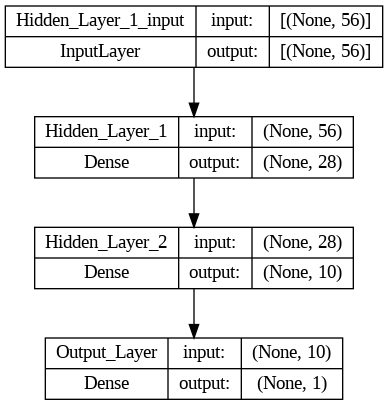

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
y_pred = model.predict(X_test)


974/974 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import precision_score

## Plotting Loss v/s Epochs

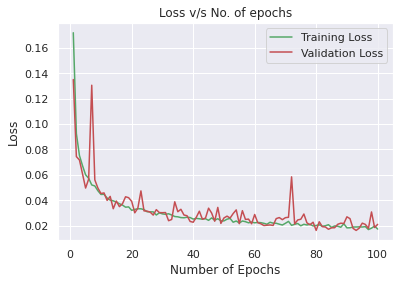

In [ ]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plotting Accuracy v/s Epochs

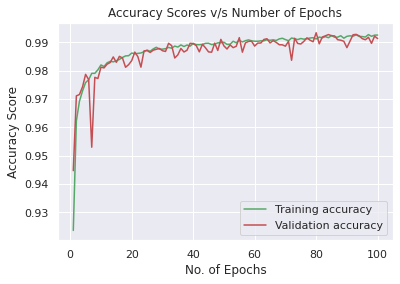

In [ ]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

## Model Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))
Classifier_accuracy.append(accuracy*100)

974/974 [==============================] - 2s 2ms/step - loss: 0.0234 - accuracy: 0.9917
Accuracy of Deep neural Network : 99.17


In [ ]:
# predict probabilities for test set
y_pred = model.predict(X_test, verbose=0)
# predict crisp classes for test set
#yhat_classes = model.predict_classes(X_test, verbose=0)


In [ ]:
# accuracy: (tp + tn) / (p + n)
dnn_accuracy = accuracy_score(y_test, y_pred.round())

In [ ]:
dnn_precision = precision_score(y_test, y_pred.round())

In [ ]:
dnn_recall = recall_score(y_test, y_pred.round())

In [ ]:
dnn_accuracy,dnn_recall,dnn_precision

(0.9916538263995891, 0.9954352787740463, 0.9835695876288659)

#### K-Nearest Neighbor Classifier

In [ ]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of KNN Classifier : %.2f" % (accuracy*100))

NameError: ignored

In [ ]:
from sklearn.metrics import recall_score,accuracy_score

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.969
Recall: 0.940
Accuracy: 0.965


In [ ]:
knn_prec=precision_score(y_test, y_pred)
knn_rec=recall_score(y_test, y_pred)
knn_acc=accuracy_score(y_test, y_pred)

#### Logistic Regression

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
y_pred=lr_clf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
Classifier_accuracy.append(accuracy*100)
print("Accuracy of Logistic Regression Classifier : %.2f" % (accuracy*100))

Accuracy of Logistic Regression Classifier : 83.87


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.828
Recall: 0.745
Accuracy: 0.839


In [ ]:
lr_prec=precision_score(y_test, y_pred)
lr_rec=recall_score(y_test, y_pred)
lr_acc=accuracy_score(y_test, y_pred)

In [ ]:
Classifier_accuracy

[99.16538000106812, 96.46250642013354, 83.86620441705188]

#### XGBoost Classifier

### Comparitive analysis of models

In [ ]:
print(X_test[0])

[7.63344624e-01 5.55555556e-01 1.68942255e-01 3.11095722e-01
 7.33652313e-02 1.59159159e-01 7.34042553e-02 4.66666667e-01
 1.19746233e-01 9.36398820e-01 9.69597178e-01 9.36450839e-01
 1.00000000e+00 2.50000000e-01 1.42882954e-01 1.36132191e-01
 1.29883382e-01 4.22271822e-04 1.30223518e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [ ]:
Classifier_names = ["DNN", "KNN", "Logistic Regression"]

In [ ]:
name=["KNN","LR","DNN"]
acc=[1,2,3]

In [ ]:
df_clf = pd.DataFrame()
df_clf['name'] = name
df_clf['precision'] = [knn_prec,lr_prec,dnn_precision]
df_clf['Accuracy'] = [knn_acc,lr_acc,dnn_accuracy]
df_clf['recall'] = [knn_rec,lr_rec,dnn_recall]

df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,precision,Accuracy,recall
2,DNN,0.983570,0.991654,0.995435
0,KNN,0.969081,0.964625,0.940170
1,LR,0.828167,0.838662,0.744865


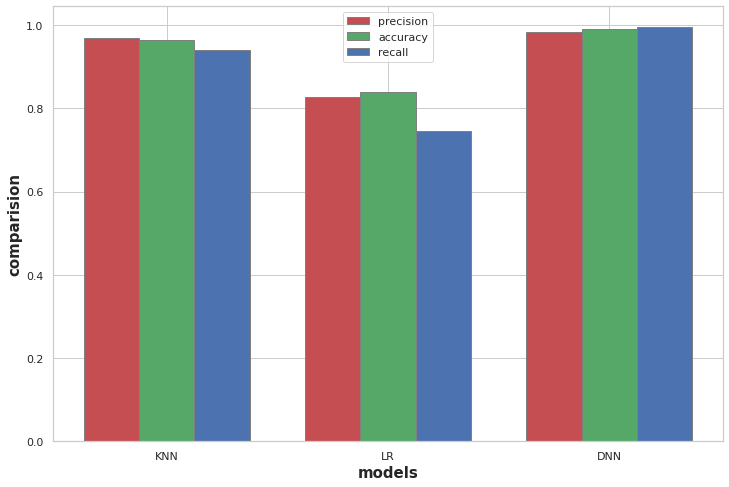

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
precision = [knn_prec,lr_prec,dnn_precision]
accuracy =  [knn_acc,lr_acc,dnn_accuracy]
recall = [knn_rec,lr_rec,dnn_recall]

# Set position of bar on X axis
br1 = np.arange(len(precision))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, precision, color ='r', width = barWidth,edgecolor ='grey', label ='precision')
plt.bar(br2, accuracy, color ='g', width = barWidth,edgecolor ='grey', label ='accuracy')
plt.bar(br3, recall, color ='b', width = barWidth,edgecolor ='grey', label ='recall')

# Adding Xticks
plt.xlabel('models', fontweight ='bold', fontsize = 15)
plt.ylabel('comparision', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(precision))],['KNN', 'LR','DNN'])
plt.legend()
plt.show()

In [ ]:
df_clf = pd.DataFrame()
df_clf['name'] = Classifier_names
df_clf['Accuracy'] = Classifier_accuracy
df_clf = df_clf.sort_values(by=['Accuracy'], ascending=False)
df_clf.head(10)

,name,Accuracy
0,DNN,99.165380
1,KNN,96.462506
2,Logistic Regression,83.866204


#### Visualize accuracies of the models

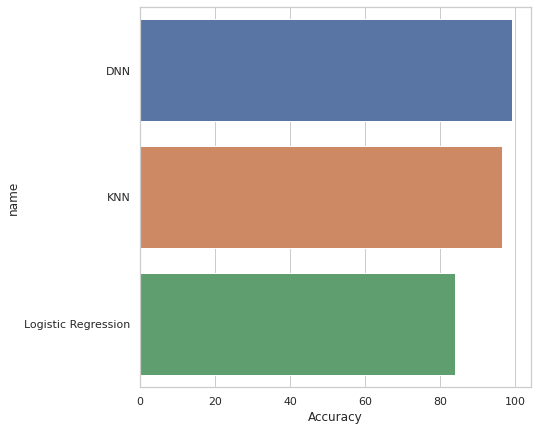

In [ ]:
sns.set(style="whitegrid",rc={'figure.figsize':(7,7)})
ax = sns.barplot(y="name", x="Accuracy", data=df_clf)

In [ ]:
print(f"The best baseline Classifier is {df_clf.name[0]} with an accuracy of {df_clf.Accuracy[0]}.")

The best baseline Classifier is DNN with an accuracy of 99.13648962974548.


## Fitting the hypermodel

In [ ]:
from itertools import product
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10,10))
    plt.grid(False)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    cm1 = cm
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)]
        thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, str(cm1[i, j])+ " ("+ str(cm[i, j]*100)+"%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

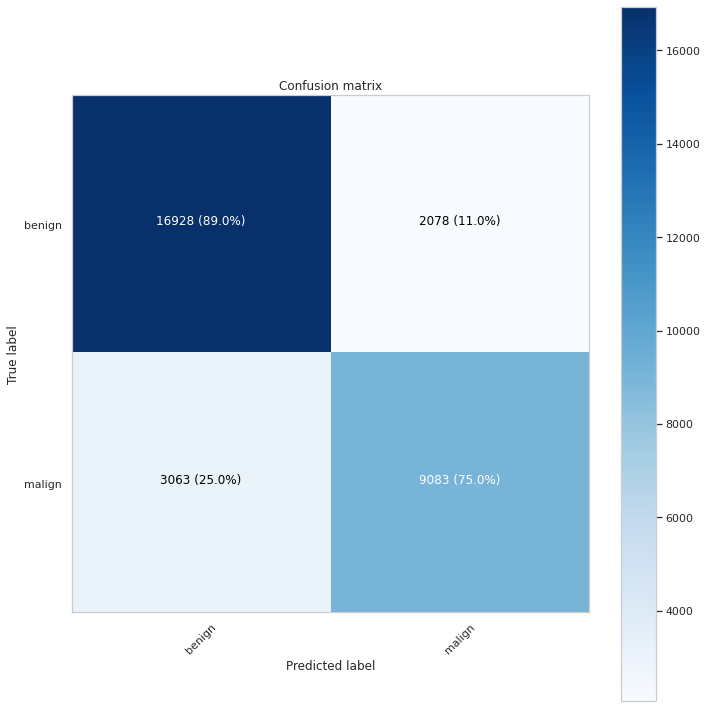

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = labels)